# Problem Statement

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. **We want to do some analysis of the average order value (AOV).** When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


2. What metric would you report for this dataset?


3. What is its value?

# Summary of The Answers
Through investigating the dataset, I found that the abnormal AOV was caused by the existence of some extremely large order amount values. These values come from two different sources:


1. A very large unit price of sneaker (\$25725) for shop No. 78


2. A very large number of items ordered (2000 items in each order) for shop No. 42


While a sneaker of \$25725 seems unreasonable, an item order of 2000 can be possible. Therefore, after careful considerations, I decided not to simply drop the large order amount values. **Instead, I used the median order value (MOV) instead of (AOV) as the metric for the dataset. The MOV value is \$284.0, which is more reasonable to describe the dataset and more helpful for the analysis**. 


In addition, I would recommend checking the data acquisition process for shop No.78, which has all its sneaker at an abnormal price of \$25725, to ensure there is no mistake in the data. 

In [ ]:
# notes
# distribution for different payment methods 
# average order value in each payment method, and distribution -> does error happen in any specific payment method?
# any change of order amount in time -> does error happen in any specific period?

# Solution Walkthrough

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Read csv file
df_raw = pd.read_csv(r"C:\DataScience\Jupyter Files\Internship Applications\Shopify Winter 2021\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [5]:
df_raw.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [6]:
df_raw.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [8]:
df_raw.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

Interestingly, there are only 4991 unique values for *created_at* column. This column indicates the time to second when the purchase was made. This means that some orders were placed at exactly the same time. It is possible, but not very likely that different orders are placed at exactly the same time. So this part of data is worth delve into. 

In [9]:
df_raw.loc[df_raw.duplicated(subset=['created_at'], keep=False)].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4567,4568,72,740,160,1,debit,2017-03-07 15:30:37
726,727,81,883,177,1,cash,2017-03-07 15:30:37
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
611,612,86,838,130,1,debit,2017-03-09 10:46:09
1243,1244,94,920,134,1,cash,2017-03-09 10:46:09
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1756,1757,27,808,169,1,cash,2017-03-13 2:38:34


As shown in the table above, half of the orders that were placed simultaneously came from different shops and users. They are orders 4647 and 4568, orders 612 and 1244, orders 1368 and 1757, orders 3617 and 4898. These orders are expected as it is possible that different users coincidentally purchased different items at the same time. 

The rest of the orders came from the same shop (shop 42) and the same user (user 607). These are unusual to me because these orders that happened at the same time could be combined into one single order. I can think of two reasons:
1. The order amount or the total items for these orders exceeded the maximum value that could be entered into the system. So the system automatically split the orders into smaller portions. 
2. These were technical issues regarding these orders, and the orders were somehow repeatedly recorded. 
To identify which reason was true, extra information would be required. For example, I need to know if the system has maximum limits for the values of order amount/total items. If not, it is worth acquiring more information from the shop or the user to ensure that technical issues did not cause the duplicated records. 

# Three different payment methods

In [10]:
df_payment_method = df_raw.iloc[:, 3:6]
df_payment_method_sum = df_payment_method.groupby(['payment_method'], as_index=False).sum()
df_payment_method_size = df_payment_method.groupby(['payment_method']).size().reset_index(name='order_counts')
df_payment_method_stat = pd.merge(df_payment_method_sum, df_payment_method_size, on='payment_method')
df_payment_method_stat['average_item_value'] = df_payment_method_stat['order_amount'] / df_payment_method_stat['total_items']
df_payment_method_stat['average_order_value'] = df_payment_method_stat['order_amount'] / df_payment_method_stat['order_counts']

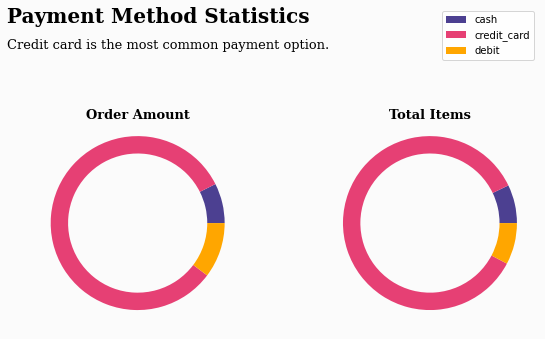

In [11]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,4)) # create figure
gs = fig.add_gridspec(ncols=2, nrows=1)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

color_map = ["#4c4091", "#e64074", "#ffa600"]

# Order Amount
ax0.pie(x=df_payment_method_stat['order_amount'], colors=color_map, wedgeprops=dict(width=0.2))

ax0.text(-1.5, 2.3, 'Payment Method Statistics', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-1.5, 2, 'Credit card is the most common payment option.', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.text(0, 1.2, 'Order Amount', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')



# Total Items
ax1.pie(x=df_payment_method_stat['total_items'], colors=color_map, wedgeprops=dict(width=0.2))
ax1.text(0, 1.2, 'Total Items', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

ax1.legend(df_payment_method_stat["payment_method"], loc="upper right", bbox_to_anchor=(1, 1.5))
plt.show()

From the above figure, we can tell that credit card is the most used payment method. The distributions based on payment methods in the order amount and total items are aligned. 

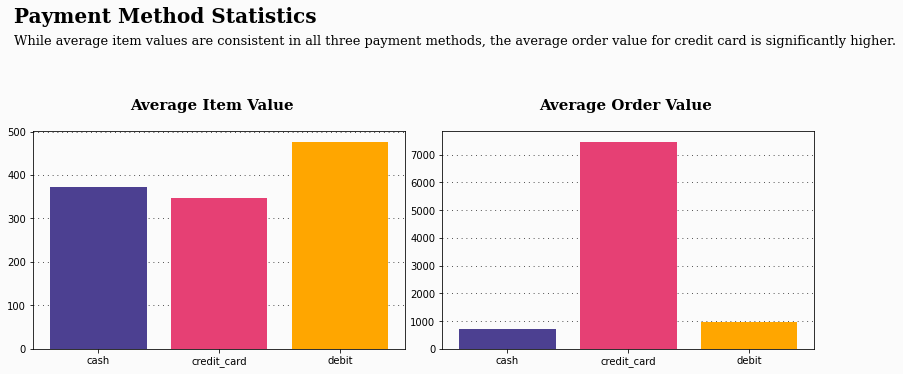

In [65]:
# Setting up figure and axes
fig = plt.figure(figsize=(14,4)) # create figure
gs = fig.add_gridspec(ncols=2, nrows=1)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

color_map = ["#4c4091", "#e64074", "#ffa600"]

# Average Item Value
ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(df_payment_method_stat["payment_method"], 
        df_payment_method_stat['average_item_value'], 
        color=color_map, zorder=3
        )
ax0.text(-0.05, 1.5, 'Payment Method Statistics', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )
ax0.text(-0.05, 1.4, 'While average item values are consistent in all three payment methods, ' \
                    'the average order value for credit card is significantly higher.', 
         fontsize=13, fontweight='light', fontfamily='serif', transform=ax0.transAxes)
ax0.text(0.26, 1.1, 
         'Average Item Value', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )
# Average Order Value
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(df_payment_method_stat["payment_method"],
        df_payment_method_stat['average_order_value'], 
        color=color_map, zorder=3
       )

ax1.text(0.26, 1.1, 
         'Average Order Value', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax1.transAxes
        )

plt.show()

We notice that overall the average item values are reasonable for sneakers. The important factor for determining whether sneaker is an affordable item or not should be the average item value, not the average order value. It is because the average order value depends on both the item price and the number of items per order. **Therefore, the sneakers are still reasonably affordable items.**

We also notice that the average order value for credit card is significantly higher than the other two payment methods. Considering that the average item value for credit card is only about \$340, this means that the average number of items per order is much higher for credit card. 

Let's take a closer look to see the distributions for the items per order. 

In [43]:
df_cash = df_raw[df_raw['payment_method']=='cash']
df_credit = df_raw[df_raw['payment_method']=='credit_card']
df_debit = df_raw[df_raw['payment_method']=='debit']

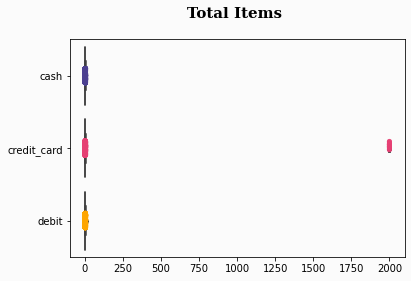

In [50]:
# Setting up figure and axes
fig = plt.figure(figsize=(6,4))
ax0 = fig.add_subplot(111)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

sns.set_palette(sns.color_palette(color_map))
ax0 = sns.boxplot(x='total_items', y='payment_method', data=df_raw)
ax0 = sns.stripplot(x='total_items', y='payment_method', data=df_raw, marker='o', jitter=True, alpha=0.8)
ax0.set(xlabel=None)
ax0.set(ylabel=None)
ax0.text(0.35, 1.1, 
         'Total Items', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )
plt.show()

We see that while all numbers of orders for cash and debit are small, very large numbers of orders exist in credit card. Let's see what the orders are: 

In [51]:
df_raw[df_raw['total_items'] > 1000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_values
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Interestingly, all orders happen between the same shop and the same user. Moreover, we've discussed previously about the orders from the shop and the user when checking unusual orders that happened simutaniously. Intuitively, I think they might be outliers. We can verify that the high AOV was indeed caused by these orders:

In [52]:
df_raw_new = df_raw[df_raw['total_items']<1000]
df_payment_method_new = df_raw_new.iloc[:, 3:6]
df_payment_method_sum_new = df_payment_method_new.groupby(['payment_method'], as_index=False).sum()
df_payment_method_size_new = df_payment_method_new.groupby(['payment_method']).size().reset_index(name='order_counts')
df_payment_method_stat_new = pd.merge(df_payment_method_sum_new, df_payment_method_size_new, on='payment_method')
df_payment_method_stat_new['average_item_value'] = df_payment_method_stat_new['order_amount'] \
                                                    / df_payment_method_stat_new['total_items']
df_payment_method_stat_new['average_order_value'] = df_payment_method_stat_new['order_amount'] \
                                                    / df_payment_method_stat_new['order_counts']

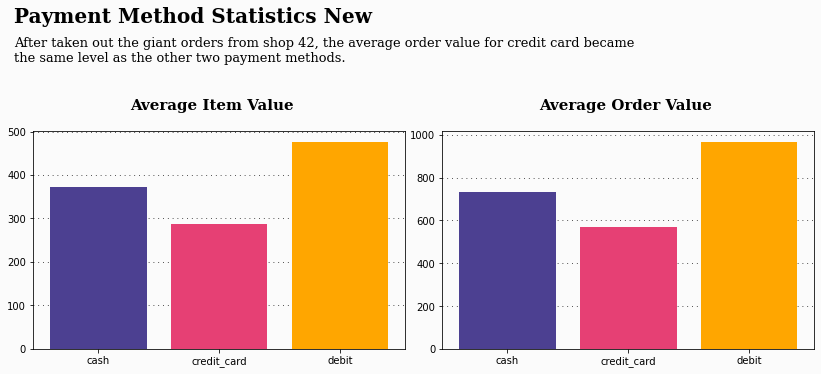

In [73]:
# Setting up figure and axes
fig = plt.figure(figsize=(14,4)) # create figure
gs = fig.add_gridspec(ncols=2, nrows=1)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

color_map = ["#4c4091", "#e64074", "#ffa600"]

# Average Item Value
ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(df_payment_method_stat_new["payment_method"], 
        df_payment_method_stat_new['average_item_value'], 
        color=color_map, zorder=3
)
ax0.text(-0.05, 1.5, 
         'Payment Method Statistics New', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )
ax0.text(-0.05, 1.32, 
         'After taken out the giant orders from shop 42, ' \
         'the average order value for credit card became \n' \
         'the same level as the other two payment methods.', 
         fontsize=13, fontweight='light', fontfamily='serif', transform=ax0.transAxes
        )
ax0.text(0.26, 1.1, 
         'Average Item Value', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )
# Average Order Value
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(df_payment_method_stat_new["payment_method"], 
        df_payment_method_stat_new['average_order_value'], 
        color=color_map, zorder=3,
        )

ax1.text(0.26, 1.1, 
         'Average Order Value', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax1.transAxes
        )
plt.show()

Through removing the orders created by user 607 in shop 42, the AOV of credit card became the same level as the other payment methods. However, if we take a closer look at the *created_at* column for those giant orders, we can notice that the orders were placed quite consistently over time. This means that these orders are probably not "errors". Let's check the AOV over time in each day:

In [81]:
df_time = df_raw.iloc[:, 3:7]
df_time['created_at_date'] = pd.to_datetime(df_time['created_at'].str.split(' ').apply(lambda x: x[0]))
df_time_sum = df_time.groupby(['payment_method', 'created_at_date'], as_index=False).sum()
df_time_size = df_time.groupby(['payment_method', 'created_at_date']).size().reset_index(name='order_counts')
df_time_stat = pd.merge(df_time_sum, df_time_size, on=['payment_method', 'created_at_date'])
df_time_stat['average_order_value'] = df_time_stat['order_amount'] / df_time_stat['order_counts']
df_time_cash = df_time_stat.loc[df_time_stat['payment_method']=='cash'].sort_values(by=['created_at_date'])
df_time_debit = df_time_stat.loc[df_time_stat['payment_method']=='debit'].sort_values(by=['created_at_date'])
df_time_credit = df_time_stat.loc[df_time_stat['payment_method']=='credit_card'].sort_values(by=['created_at_date'])

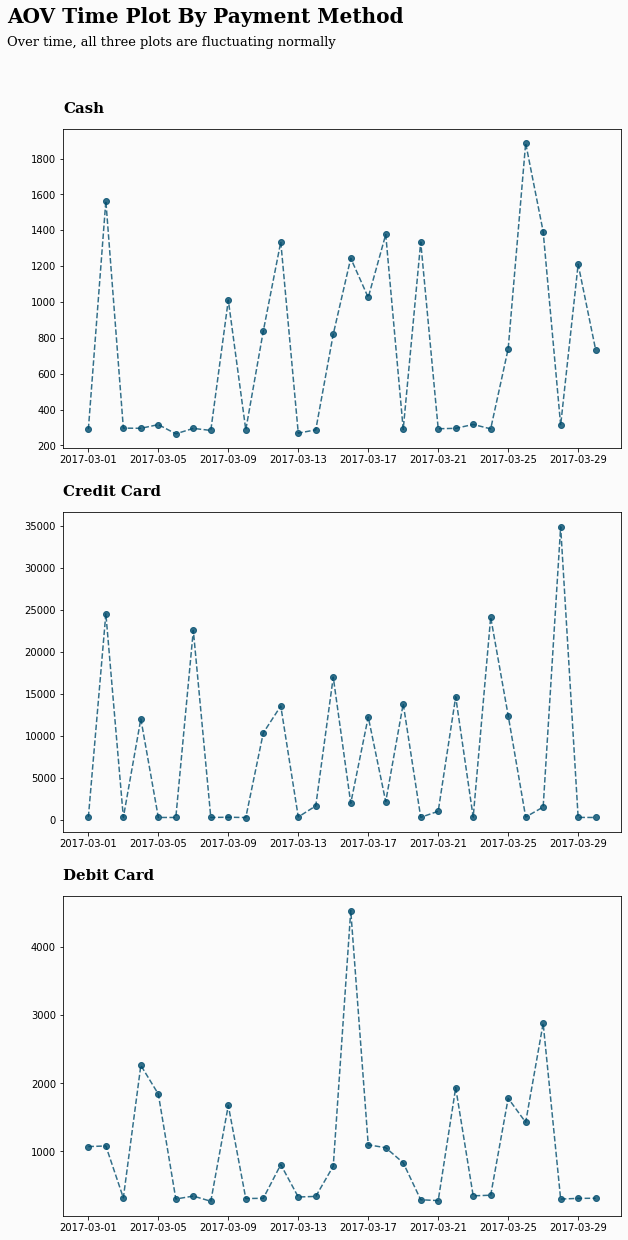

In [83]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.1, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0]) 
ax2 = fig.add_subplot(gs[2, 0]) 

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

# Cash
ax0.plot(df_time_cash['created_at_date'], df_time_cash["average_order_value"], 'o--', color="#004c6d", alpha=0.8)
ax0.text(-0.1, 1.33, 'AOV Time Plot By Payment Method', fontsize=20, fontweight='bold', fontfamily='serif', transform=ax0.transAxes)
ax0.text(-0.1, 1.26, 'Over time, all three plots are fluctuating normally', 
         fontsize=13, fontweight='light', fontfamily='serif', transform=ax0.transAxes)
ax0.text(0, 1.05, 
         'Cash', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax0.transAxes
        )

# Credit Card
ax1.plot(df_time_credit['created_at_date'], df_time_credit["average_order_value"], 'o--', color="#004c6d", alpha=0.8)

ax1.text(0, 1.05, 
         'Credit Card', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax1.transAxes
        )

# Debit Card
ax2.plot(df_time_debit['created_at_date'], df_time_debit["average_order_value"], 'o--', color="#004c6d", alpha=0.8)
ax2.text(0, 1.05, 
         'Debit Card', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
         transform=ax2.transAxes
        )

plt.show()

We see that over time, all three payment methods have relatively normal fluctuations, especially for the credit card. Therefore, it may be inappropriate to simply consider the giant orders as outliers. Instead, the AOV obtained does reflect the true AOV of the orders. However, because of the giant orders that significantly skewed the AOV, this metric might not be very useful to represent the general order values. 

If the question of interest is to understand the general order values, then a better metric to use in this case would be **median order value (MOV)**:

In [87]:
mov = df_raw['order_amount'].median()
print("The median order value is: ${0:.2f}".format(mov))

The median order value is: $284.00


If the question of interest is to understand the affordability of the item, then a better metric to use would be **average item value (AIV)**:

In [86]:
aiv = df_raw['item_values'].mean()
print("The average item value is: ${0:.2f}".format(aiv))

The average item value is: $387.74


First, we need to understand the definition of the average order value (AOV):

"Average order value (AOV) is the average amount of money each customer spends per transaction with your store. You can calculate your average order value using this simple formula: **Total revenue / number of orders = average order value**" (from [shopify blog](https://www.shopify.ca/blog/average-order-value))

After a quick view on the dataset, the columns that are relevent for calculating AOV are:


- order_id: this column describes the individual order ID. Ideally, every order should generate a distinct order ID. Total number of orders can thus be found by calculating the total number of order IDs.


- order_amount: this column describes the value of each order. Total revenue can be found by sum up all the values in this column.


We can verify that the thought process is correct by performing the calculation:

In [ ]:
aov_naive = sum(df_raw['order_amount']) / len(df_raw['order_id'])
print("Naive AOV: ${0:.2f}".format(aov_naive))

The naive AOV calculated above matches the value given in the problem statement. The process of calculation AOV seems correct. However, **the problem is that an AOV of $3145.13 seems to be too big for sneaker shops**. So we need to find out the plausible causes.

There are two hypotheses that may contribute to the problem:


1. The dataset contains duplicates which have large *order_amount* values.


2. The dataset contains outliers in either *order_amount* values or sneaker unit prices.


Let's verify each hypothesis:

**Hypothesis 1. the dataset contains duplicates which have large order_amount values**

In [ ]:
df_raw.duplicated().value_counts()

As no "True" is present in our analysis above, there is no duplicate in the dataset. However, to be more confident about the result, we can further verify by checking if there is any duplicate in the order ID, as the order ID should be distinct for each order.

In [ ]:
df_raw['order_id'].duplicated().value_counts()

The order ID also does not have duplicate. So the problem should not be due to the presence of the duplicate.

**Hypothesis 2. the dataset contains outliers in either *order_amount* values or sneaker unit prices**


Let's first check the *order_amount* column:

In [ ]:
ax = sns.distplot(df_raw['order_amount'], kde=False, rug=True)
ax.set(ylabel = 'Frequency')
plt.show()

The histograph above shows both the frequency of the order amount, represented by the thick bar, and where the order amount occurs, represented by the thin bars. It can be noticed that the majority of the order amount are small, while several order amount is very large. These large order amount can significantly skew the data distribution and greatly impact the average. **In this situation, we can either drop the large order amount, or use median instead of mean to describe the order value.** To make the desicion, let's take a closer look at what causes the order amount to be so large. If the causes are not reasonable, we should drop the data. Otherwise we should still maintain the data and choose to use median value for our analysis.

In [35]:
df_big_order_amount = df_raw[df_raw['order_amount'] > 10000]
print("Total big order amount: {}".format(len(df_big_order_amount['order_amount'])))
print("Big order amount: ")
print(df_big_order_amount['order_amount'].value_counts())

Total big order amount: 63
Big order amount: 
25725     19
704000    17
51450     16
77175      9
102900     1
154350     1
Name: order_amount, dtype: int64


In [36]:
df_big_order_amount[df_big_order_amount['order_amount'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43


From the above table, it is very interesting to see that the shop No.78 sells its sneakers at a price of $25725!! Although there exists [shoes that cost thousands of dollars](https://www.sneakerfreaker.com/features/10-of-the-most-stupidly-expensive-sneakers-ever), they are usually shoes either with limited edition or with special values. **Generally speaking, this data does not seem normal so might worth more digging to ensure there is no mistake of how the data was acquired and processed.** To check if others have similar abnormal unit prices, we can add a column to list the unit prices for each sneaker.

In [41]:
df_big_order_amount.loc[:, 'unit_price'] = df_big_order_amount.loc[:, 'order_amount'] / df_big_order_amount.loc[:, 'total_items']  

**Interestingly, after a further investigation, we can see that most of the big order amount (46 out of 63) is caused by this expensive sneaker sold by shop No. 78:**

In [49]:
print("Total expensive sneakers: {}".format(len(df_big_order_amount[df_big_order_amount['unit_price']== 25725.0])))
df_big_order_amount[df_big_order_amount['unit_price'] == 25725.0]

Total expensive sneakers: 46


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


**While the rest of the big order amount is caused by large total items orderd in each order from shop No.42:**

In [51]:
df_big_order_amount[df_big_order_amount['unit_price'] != 25725.0]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Large total items in each order is not a very abnormal situation, as it might just because the shop is popular. Thus we should maintain these order amount values. Considering that some of the large order amount values have to be maintained (which will still skew the distribution), **it is thus better to use median value instead of mean value for the order value analysis. In addition, we should check if there is any mistake in the data acquisition process for shop No. 78.**

### Calculate the median order value (MOV)

In [53]:
mov = df_raw['order_amount'].median()
print("The median order value is: ${}".format(mov))

The median order value is: $284.0
